In [2]:
from __future__ import division, print_function, unicode_literals

In [3]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])

In [4]:
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

In [5]:
video.size

4

In [6]:
video[0]

10.5

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
u = np.array([2, 5])
v = np.array([3, 1])

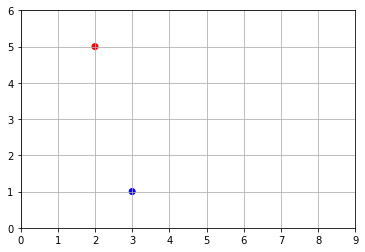

In [9]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r", "b"]) 
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

In [10]:
# Vectors can be represented by arrows:

def plot_vector2d(vector2d, origin=[0,0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
                    head_width=0.2, head_length=0.3, length_includes_head=True,
                    **options)

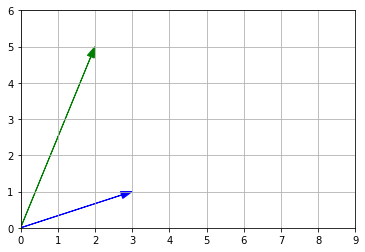

In [11]:
# Now let's draw the vectors u and v as arrows:

plot_vector2d(u, color="g")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

In [12]:
# Let's do 3D vectors:

a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

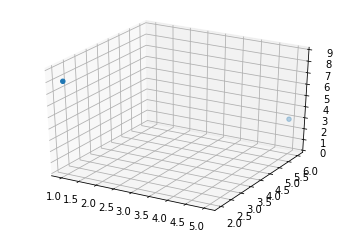

In [13]:
from mpl_toolkits.mplot3d import Axes3D


subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim([0, 9])
plt.show()

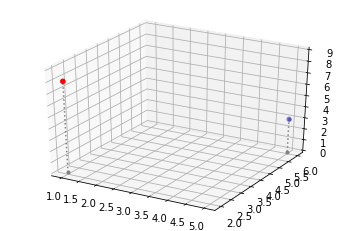

In [14]:
# It's a bit hard to visualize the points, so lets add some lines...

def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0,z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)
    
subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0,9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r", "b"))
plt.show()

In [15]:
# Norm is the magnitude of a vector. In our case we will use the Euclidian Norm.

def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "||")
vector_norm(u)

|| [2 5] ||


5.385164807134504

In [16]:
# It's more efficient to use Numpy's Norm function available in linalg module:

import numpy.linalg as LA

LA.norm(u)

5.385164807134504

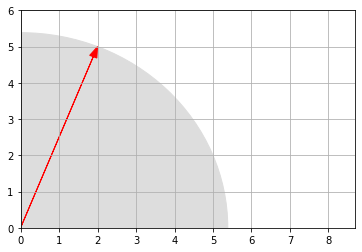

In [17]:
# Let's plot a diagram to prove that the vector u is indeed approximately 5.4.

radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

In [18]:
# Vector Addition:

print("", u)
print("+", v)
print("-"*10)
u+v

 [2 5]
+ [3 1]
----------


array([5, 6])

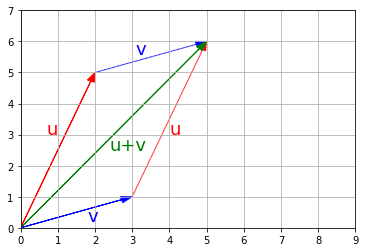

In [19]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

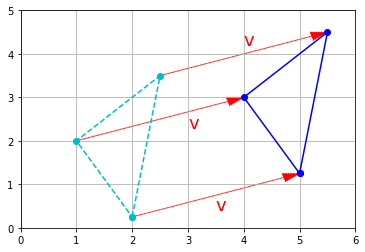

In [20]:
# Below is a plot of an example of geometric translation via vector addition

t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords =zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()





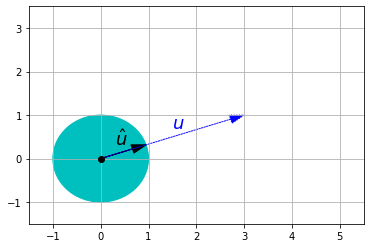

In [21]:
# The following code displays a normalized vector of a nonull vector u.

plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

In [22]:
# This is the code for the dot product without using the Numpy library:

def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1,v2))

dot_product(u, v)

11

In [23]:
# This is the code for the more efficient dot product using Numpy:

np.dot(u,v)

11

In [24]:
# Equivalently, you can use the dot method of ndarrays:

u.dot(v)

11

In [25]:
print("  ", u)
print("* ", v,  "(NOT a dot product)")
print("-"*10)

u*v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

In [26]:
# Calculating the angle between vectors:

def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle=", theta, "radians")
print("    =", theta * 180 / np.pi, "degrees")

Angle= 0.8685393952858895 radians
    = 49.76364169072618 degrees


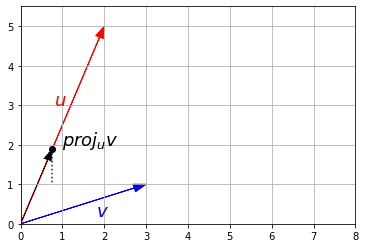

In [27]:
# Projecting a point onto an axis:

u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], proj[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

In [28]:
# A Matrix without the use of the Numpy Library:

[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

In [29]:
# A matrix using the Numpy Library:

A =np.array([[10, 20, 30], [40, 50, 60]])
A

array([[10, 20, 30],
       [40, 50, 60]])

In [30]:
# Show the number of rows and the number of columns of a matrix:

A.shape

(2, 3)

In [31]:
# Show the number of elements in a matrix:

A.size

6

In [32]:
# Element Indexing.
# States the value in the specified row and column.

A[1, 2] # Second Row, Third Column

60

In [33]:
A[0, :] # First row vector

array([10, 20, 30])

In [34]:
A[:, 2] # Third Column vector

array([30, 60])

In [35]:
A[0:1, :] # Shows row between 1 and 2. Excludes 2

array([[10, 20, 30]])

In [36]:
# Diagonal Matrix:

np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [37]:
# Extract a diagonal matrix from a complete square matrix:

X = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]])
np.diag(X)

array([1, 5, 9])

In [38]:
# Adding Matrices. Only if they are the same size can they be added.
B = np.array([[1, 2, 3], [4, 5, 6]])
C = np.array([[3, 4, 5], [8, 9, 77]])

B + C

array([[ 4,  6,  8],
       [12, 14, 83]])

In [39]:
# Scalar Multiplication:
3 * B

array([[ 3,  6,  9],
       [12, 15, 18]])

In [40]:
3 * C

array([[  9,  12,  15],
       [ 24,  27, 231]])

In [41]:
# Multiplying Matrices in Numpy, using ndarray's dot method: (M x N) * (N x P) = (M x P)

D = np.array([
    [2, 3, 5, 7],
    [11, 13, 17, 19],
    [23, 29, 31, 37]
])

A = np.array([
    [10, 20, 30],
    [40, 50, 60]
])

E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

In [42]:
# This is the code for transposing a matrix:

A.T


array([[10, 40],
       [20, 50],
       [30, 60]])

In [43]:
# The product of a matrix and its transpose is a symmetric matrix
A.dot(A.T)

array([[1400, 3200],
       [3200, 7700]])

In [45]:
# Converting 1D arrays to 2D arrays in Numpy:

u = np.array([2, 5])
u

array([2, 5])

In [46]:
# Transposing for a 1D array looks the same.
u.T

array([2, 5])

In [47]:
# Before transposing a 1D vector, we have to first convert it to a row vector:

u_row = np.array([u])
u_row

# The output shows double brackets which shows it it a 1x2 matrix or a row vector.

array([[2, 5]])

In [48]:
u_row.T

array([[2],
       [5]])

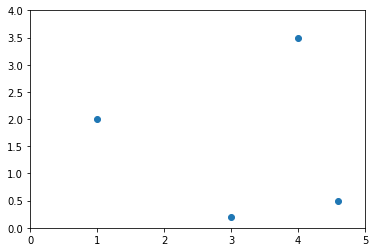

In [49]:
# Plotting a matrix:

P = np.array([
    [3.0, 4.0, 1.0, 4.6],
    [0.2, 3.5, 2.0, 0.5]
])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

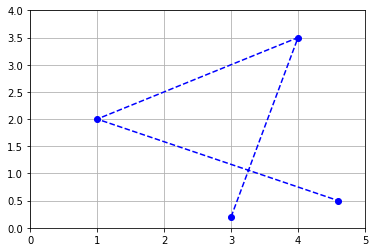

In [50]:
# Since vectors are ordered, you can see the matrix as a path and represent it with connected dots:

plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

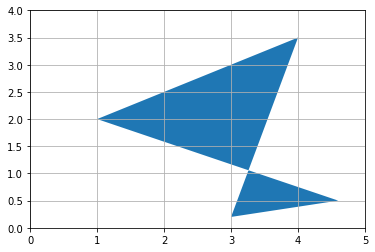

In [51]:
# Using matplotlib, polygons can be created:

from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

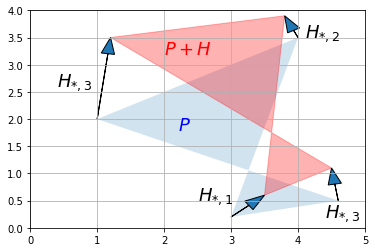

In [53]:
# Addition = multiple geometric translations

H = np.array([
    [0.5, -0.2, 0.2, -0.1],
    [0.4, 0.4, 1.5, 0.6]
])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)
    
plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,3}$", color="k", fontsize=18)
         
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()


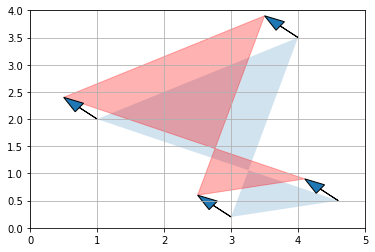

In [54]:
# If we add a matrix full of identical vectors, we get a simple geometric translation:

H2 = np.array([
    [-0.5, -0.5, -0.5, -0.5],
    [0.4, 0.4, 0.4, 0.4]
])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)
    
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

In [55]:
# Although matrices can only be added if they are the same size, NumPy allows adding a row vector and column vector to a matrix:

P + [[-0.5], [0.4]] # Same as P + H2, thanks to Numpy broadcasting

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

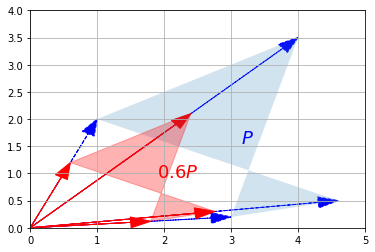

In [57]:
# Scalar multiplication results in rescaling te entire figure:

def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()
    
P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

In [58]:
# Matrix Multiplication- Projection onto an axis.

# Define a row vector which is just the horizontal unit vector:

U = np.array([[1, 0]])

In [60]:
# Now Find Dot Product of U and P:

U.dot(P)

# The output below displays the horizonal coordinates of P. We projected P onto the horizontal axis.

array([[3. , 4. , 1. , 4.6]])

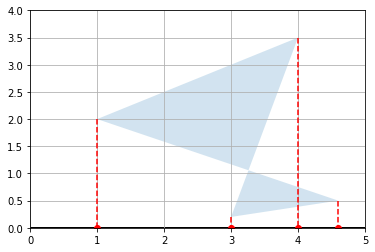

In [61]:
# Graphical Representation of the projection of P onto the horizontal axis:

def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")
    
    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")
        
    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()
    
plot_projection(U, P)

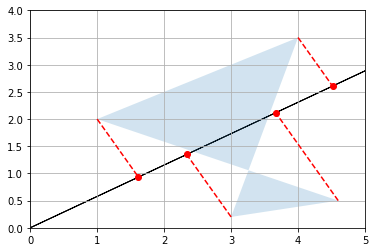

In [62]:
# We can project points onto any other axis by replacing U with any other unit vector. For example, let's project on the axis that is on 30 degree angle above the horizontal axis.

angle30 = 30 * np.pi / 180 # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

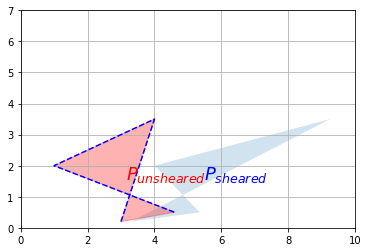

In [64]:
# Matrix Inverse. We will reverse/invert some transformations:

F_shear = np.array([
    [1, 1.5],
    [0, 1]
])


F_inv_shear=np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{sheared}$", "$P_{unsheared}$", axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()



In [65]:
# A determinant is useful for solving systems of linear equations, and to find the inverse of a matrix.

M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
])
LA.det(M)

27.0

In [66]:
# Singular Value Decomposition. Any m X n matrix can be decomposed into the dot product of three simple matrices: 
    # A rotation matrix U (an m x m orthogonal matrix)
    # A scaling and projecting matrix Sigma ( an m x n diagonal matrix )
    # and another rotation matrix V**T (an n x n orthogonal matrix)
    
# An orthogonal matrix is a matrix that can be multiplied by its inverse to  equal it's identity matrix... To cancel it out.


# Let's decompose this Shear Transformation:

U, S_diag, V_T = LA.svd(F_shear)


In [67]:
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [70]:
S_diag

# To get the actual diagonal matrix and not just the 1D array:

S = np.diag(S_diag)

In [69]:
V_T

array([[ 0.4472136 ,  0.89442719],
       [-0.89442719,  0.4472136 ]])

In [73]:
# Now let's check that the dot product of these three matrices equals F_shear:

U.dot(S).dot(V_T)

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

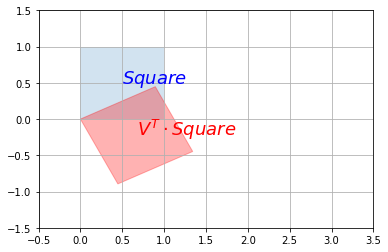

In [74]:
# now let's apply these transformations one by one in reverse order on the unit square to understand what's going on.

# first we will apply V_T:

Square = np.array([
    [0, 0, 1, 1],
    [0, 1, 1, 0]
])

plot_transformation(Square, V_T.dot(Square), "$Square$", "$V^T \cdot Square$", axis=[-0.5, 3.5, -1.5, 1.5])
plt.show()

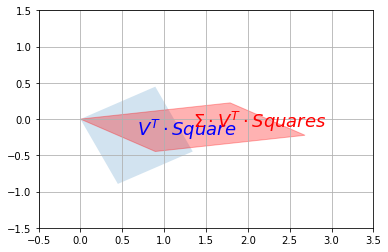

In [75]:
# Now let's rescale along the vertical and horizontal axes using Sigma:

plot_transformation(V_T.dot(Square), S.dot(V_T).dot(Square), "$V^T \cdot Square$", "$\Sigma \cdot V^T \cdot Squares$",
                                       axis=[-0.5, 3.5, -1.5, 1.5])

plt.show()


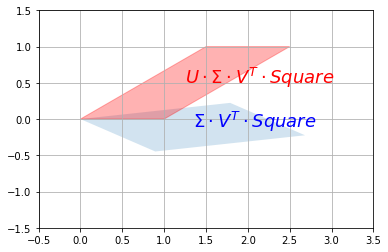

In [77]:
# Finally we apply the second rotation U:

plot_transformation(S.dot(V_T).dot(Square), U.dot(S).dot(V_T).dot(Square),
                   "$\Sigma \cdot V^T \cdot Square$",
                   "$U \cdot \Sigma \cdot V^T \cdot Square$",
                   axis=[-0.5, 3.5, -1.5, 1.5]
                   )
plt.show()
    


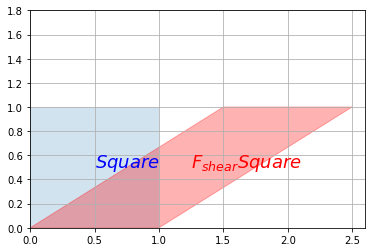

In [78]:
# We can see that the result of the dot product of the  decomposition is the shear mapping of the original unit square:

plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

In [80]:
# Eigenvector of a square matrix M is a non-zero vector that remains on the same line after  transformation by the linear transformation associated with M.

# M is a set of eigenvalues that transform the vector in a way that it is on the same line:

F_squeeze = np.array([
    [1.4, 0],
    [0, 1/1.4]
])

eigenvalues, eigenvectors = LA.eig(F_squeeze)
eigenvalues

array([1.4       , 0.71428571])

In [81]:
eigenvectors

# The horizontal vectors are stretched by a factor of 1.4, and the vertical vectors are shrunk by a factor of 1/1.4=0.714

array([[1., 0.],
       [0., 1.]])

In [82]:
# Let's look at the shear mapping matrix F_shear:

eigenvalues2, eigenvectors2 = LA.eig(F_shear)
eigenvalues2

array([1., 1.])

In [83]:
eigenvectors2

# The output below is due to floating point errors

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

In [84]:
# The trace of a square matrix M, noted tr(M) is the sum of the values on its main diagonal. For example:

D = np.array([
    [100, 200, 300],
    [ 10,  20,  30],
    [  1,   2,   3]
])

np.trace(D)

123

In [ ]:
# The trace doesn't usually have a simple geometric interpretation but has properties that make it useful for other things.